# 👩‍💻 Activité 2 : Pourquoi et comment normaliser des données avant d’entrainer un modèle de machine learning ?

<img src="https://cdn.pixabay.com/photo/2018/04/28/03/04/road-3356478_960_720.jpg" alt="Logo Scikit-Learn" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Pourquoi est-il important de normaliser les données avant d'entrainer des modèles de machine learning ?
___
Si les données ne sont pas ramenées sur une même échelle, les **grandes valeurs** vont avoir **plus d'importance** sur le modèle et donc elles peuvent dégrader la qualité du modèle.

Source : https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
___
### - Les résultats des modèles de machine learning sont-ils forcément améliorés avec la normalisation des données ?
___
La **normalisation des données** en amont de l'entrainement des modèles **amèliore** la qualité de la prédiction pour la majorité des modèles. Les **rares modèles non impactés** par la normalisation sont les modèles à base d'**arbres de décision** car ils traitent les caractèristiques individuellement.

Source : https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6
___
### - Pourquoi est-il plus intéressant d'utiliser un transformeur de la bibliothèque Scikit-Learn pour effectuer la normalisation plutôt que de la coder directement en Python ?
___
Les transformeurs comme `StandardScaler` ou `MinMaxScaler` peuvent **apprendre des informations** sur le jeu de données d'entrainement (moyenne, écart-type, min, max) et appliquer les tranformations sur de nouvelles données **sans fuites d'informations**. Ces transformeurs peuvent intégrés dans des **pipelines** Scikit-Learn.

Source :

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
___
### - Citer 3 manières de normaliser les données avec la bibliothèque Scikit-Learn et expliquer les différences
___

- `StandardScaler` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

On retire la moyenne et on divise par l'écart-type pour chaque donnée (z-score) :

$$z = \dfrac{(x - \mu)}{\sigma}$$

- `MinMaxScaler` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

On retire la valeur minimale et on divise par l'écart entre la valeur maximale et la valeur minimale pour chaque donnée :

$$x_{minmax} = \dfrac{(x - x_{min})}{x_{max} - x_{min}}$$

- `RobustScaler` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

On retire la médiane et on divise par l'écart inter-quartile (IQR) pour chaque donnée :

$$x_{robust} = \dfrac{(x - x_{median})}{x_{75} - x_{25}}$$

Source :

- https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
___

## ✏️ Activités

- Importer les bibliothèques suivantes : Pandas, Matplotlib, et Scikit-Learn (load_iris de sklearn.datasets)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

- Le jeu de données **Iris** est un des **plus utilisé comme exemple** en datascience. Il est directement **intégré** dans la bibliothèque Scikit-Learn. Récupérer le jeu de données depuis Scikit-Learn dans un dataframe Pandas : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [5]:
data = load_iris(as_frame=True)
df = data.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Supprimer la colonne "target" du dataframe

In [6]:
df = df.drop("target", axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

- Vérifier qu'il n'y a **pas de valeurs manquantes** dans le dataframe

In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

- **Analyser statistiquement** le dataframe : afficher la moyenne arithmétique, l'écart-type, les quartiles, la médiane et les valeurs extrêmes (min et max) pour les différentes caractéristiques du jeu de données

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

- **Analyser graphiquement** la distribution des données. Pour chaque caractèristique, tracer l'**histogramme** de la distribution des données et un diagramme de **boîtes à moustaches (box plot)** pour l'ensemble des caractéristiques

In [9]:
list(zip([1, 2, 3], ["a", "b", "c", "d"], ["a", "b", "c", "d"]))

[(1, 'a', 'a'), (2, 'b', 'b'), (3, 'c', 'c')]

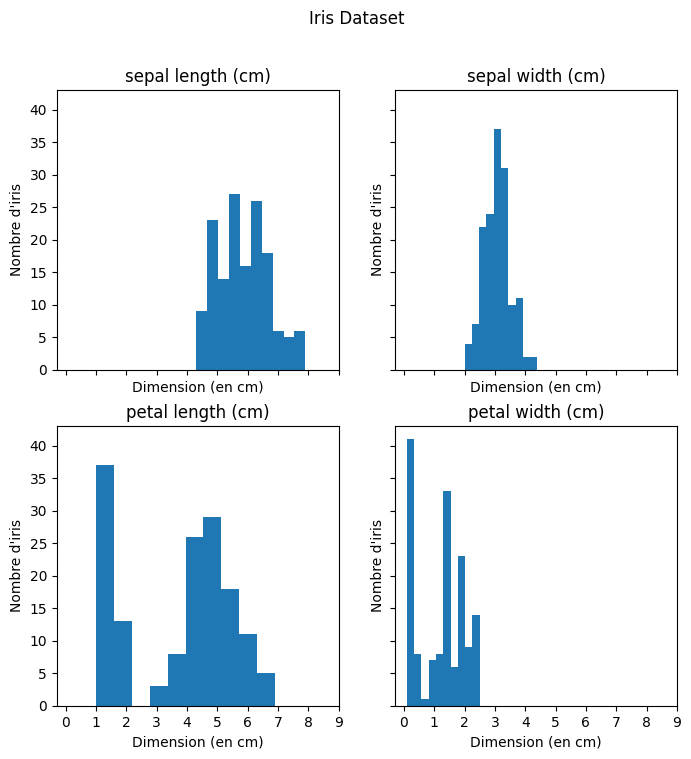

In [10]:
def create_hist(df, min_scale, max_scale):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
    for ax, col in zip(axs.ravel(), df.columns):
        ax.hist(df[col])
        ax.set_title(col)
        ax.set(xlabel="Dimension (en cm)", ylabel="Nombre d'iris")
    fig.suptitle("Iris Dataset")
    plt.xticks(range(min_scale, max_scale))
    plt.show()
create_hist(df, 0, 10)

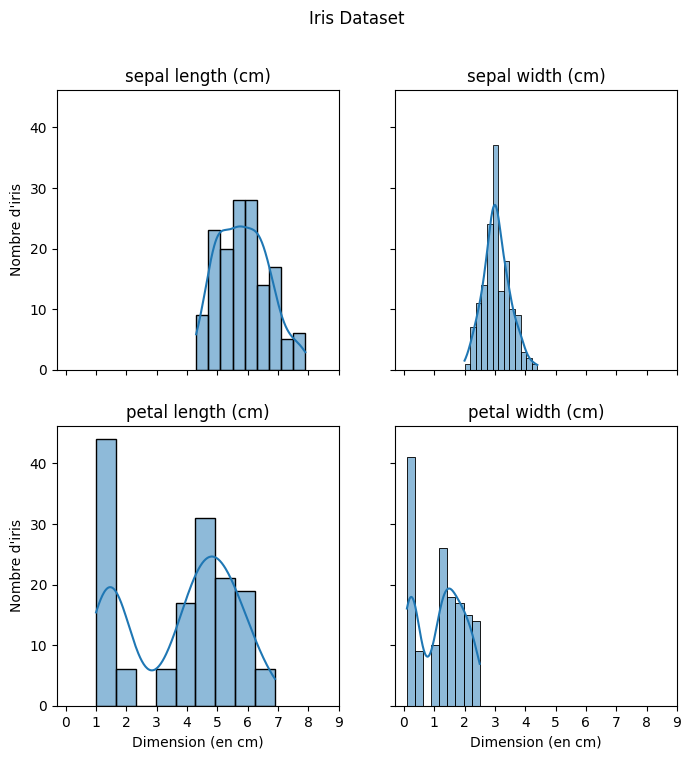

In [11]:
import seaborn as sns    

def create_density(df, min_scale, max_scale):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
    for ax, col in zip(axs.ravel(), df.columns):
        sns.histplot(df, x=col, kde=True, ax=ax)
        ax.set_title(col)
        ax.set(xlabel="Dimension (en cm)", ylabel="Nombre d'iris")
    fig.suptitle("Iris Dataset")
    plt.xticks(range(min_scale, max_scale))
    plt.show()
create_density(df, 0, 10)

Référence : https://fr.wikipedia.org/wiki/Estimation_par_noyau

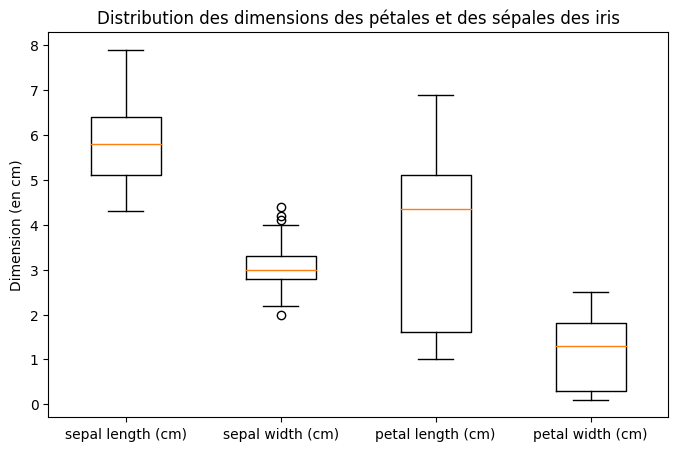

In [12]:
def create_box(df):
    plt.figure(figsize=(8, 5))
    plt.boxplot(df)
    plt.title("Distribution des dimensions des pétales et des sépales des iris")
    plt.ylabel("Dimension (en cm)")
    plt.xticks(ticks=range(1, 5), labels=list(df.columns))
    plt.show()
create_box(df)

Documentation :

- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

### Standardisation des données

- Importer la classe `StandardScaler` de la bibliothèque Scikit-Learn

In [13]:
from sklearn.preprocessing import StandardScaler

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Créer un dataframe avec les données des iris **standardisées**

In [15]:
type(scaler.fit_transform(df))

numpy.ndarray

In [14]:
scaler = StandardScaler()
df_standardise = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_standardise

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


- Afficher les **attributs** de l'instance de `StandardScaler` pour retrouver la **moyenne** et l'**écart-type** du jeu de données

In [16]:
print(f"Moyennes du jeu de données : {scaler.mean_}")
print(f"Ecart-type du jeu de données : {scaler.scale_}")

Moyennes du jeu de données : [5.84333333 3.05733333 3.758      1.19933333]
Ecart-type du jeu de données : [0.82530129 0.43441097 1.75940407 0.75969263]


- **Analyser statistiquement** le dataframe standardisé et vérifier la valeur de la moyenne et de l'écart-type

In [17]:
df_standardise.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


On retrouve une **moyenne** d'environ **0** et un **écart-type** de **1**

- **Analyser graphiquement** la distribution des données avec des histogrammes et des boîtes à moustaches (box plot).

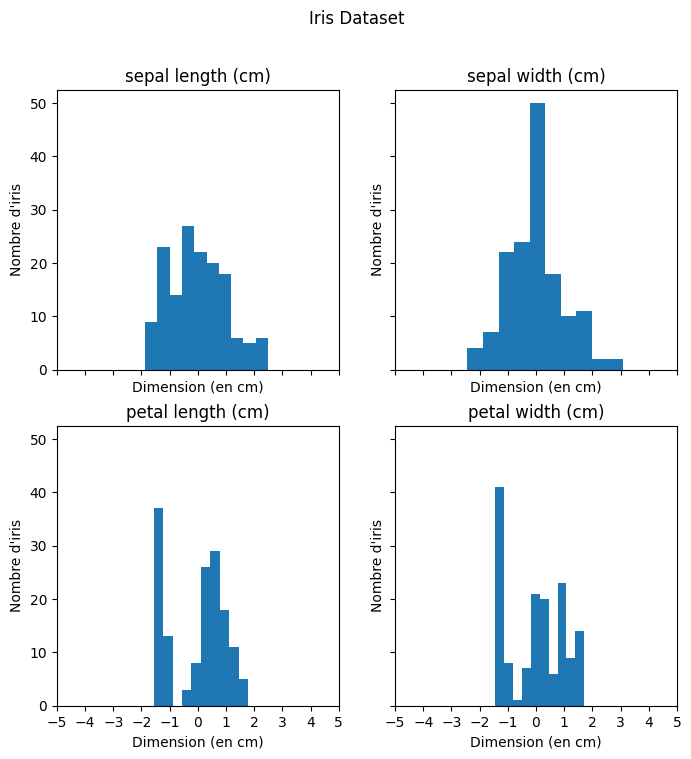

In [18]:
create_hist(df_standardise, -5, 6)

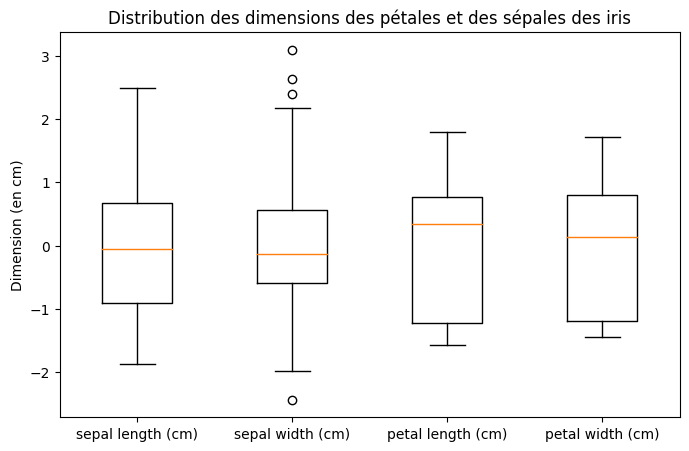

In [19]:
create_box(df_standardise)

### Normalisation min/max des données

- Importer la classe `MinMaxScaler` de la bibliothèque Scikit-Learn

In [20]:
from sklearn.preprocessing import MinMaxScaler

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- Créer un dataframe avec les données des iris **normalisées**

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
min_max_scaler = MinMaxScaler()
df_normalize = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_normalize

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


- Afficher les attributs de l'instance de MinMaxdScaler pour retrouver la **valeur minimale** et la **valeur maximale** du jeu de données

In [22]:
print(f"Min du jeu de données : {min_max_scaler.data_min_}")
print(f"Max du jeu de données : {min_max_scaler.data_max_}")

Min du jeu de données : [4.3 2.  1.  0.1]
Max du jeu de données : [7.9 4.4 6.9 2.5]


- **Analyser statistiquement** le dataframe normalisé et vérifier la valeur minimale et maximale du jeu de données

In [25]:
df_normalize.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


- **Analyser graphiquement** la distribution des données avec des histogrammes et des boîtes à moustaches (box plot).

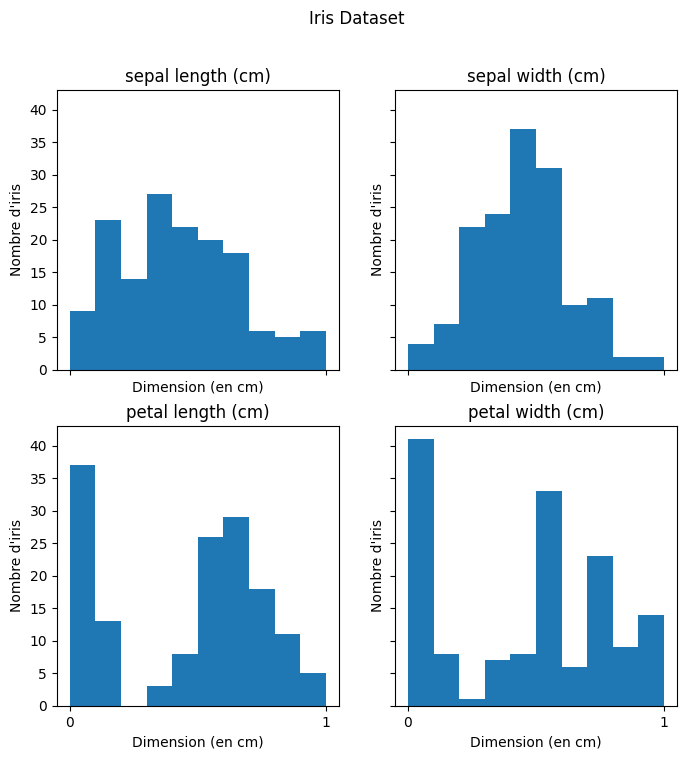

In [26]:
create_hist(df_normalize, 0, 2)

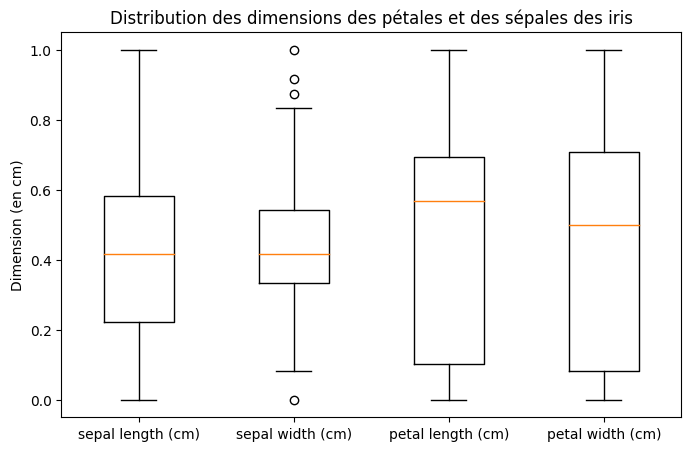

In [27]:
create_box(df_normalize)

### Normalisation par RobustScaler des données

- Importer la classe `RobustScaler` de la bibliothèque Scikit-Learn

In [28]:
from sklearn.preprocessing import RobustScaler

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

- Créer un dataframe avec les données des iris normalisées par `RobustScaler`

In [29]:
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
df_robust

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


- Afficher les attributs de l'instance de `RobustScaler` pour retrouver la **médiane** et la **distance interquartile (IQR)** du jeu de données

In [31]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
print(f"Médiane du jeu de données : {robust_scaler.center_}")
print(f"IQR du jeu de données : {robust_scaler.scale_}")

Médiane du jeu de données : [5.8  3.   4.35 1.3 ]
IQR du jeu de données : [1.3 0.5 3.5 1.5]


- **Analyser statistiquement** le dataframe normalisé par `RobustScaler`

In [32]:
df_robust.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.114667,-1.691429e-01,-0.067111
std,0.636974,0.871733,5.043709e-01,0.508158
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


- **Analyser graphiquement** la distribution des données avec des **histogrammes** et des **boîtes à moustaches (box plot)**.

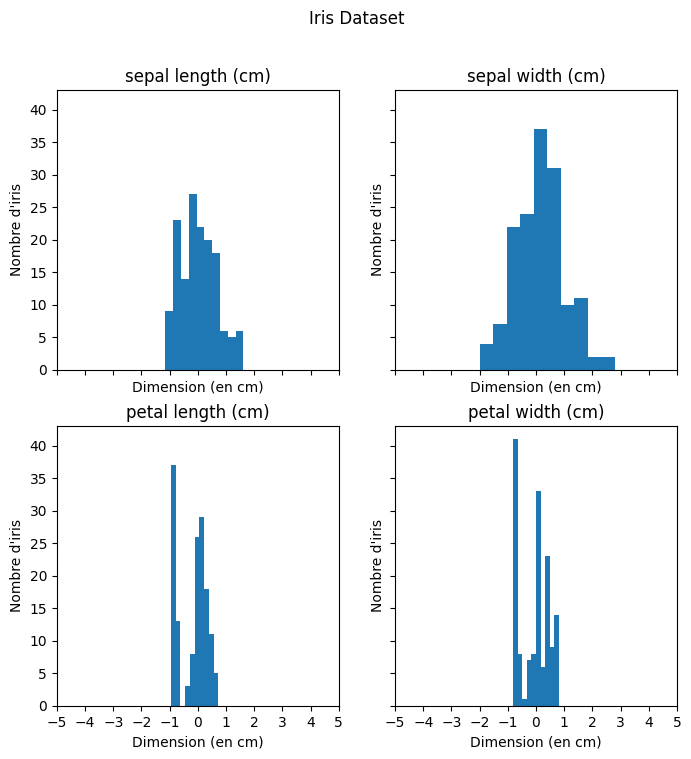

In [33]:
create_hist(df_robust, -5, 6)

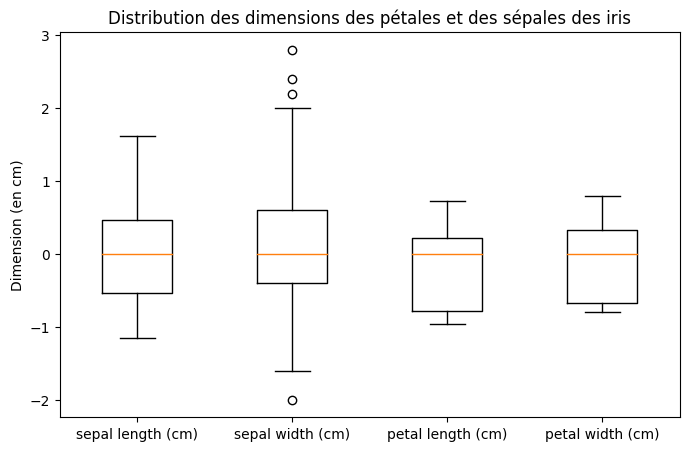

In [34]:
create_box(df_robust)

## 🚀 Pour aller plus loin

- Comparaison de **différentes méthodes de normalisation** avec la bibliothèque Scikit-Learn : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

- ⚠️ Dans le cadre de l'**analyse du langage naturel (NLP)** ou du **clustering**, la normalisation correspond à ramener chaque ligne du jeu de données à une **norme (L1, L2 ou autre) de valeur 1** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source image d'illustration : *Image par Tom de Pixabay*